In [2]:
# データフレーム用クラスをインポート
import pandas as pd

# 描画用ライブラリをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# サンプル分割用の関数をインポート
from sklearn.model_selection import train_test_split

# データの標準化を行うためのモジュールをインポート
#from sklearn.preprocessing import StandardScaler

# 勾配ブースティング決定木を行うためのモジュールをインポート
from sklearn.ensemble import GradientBoostingClassifier

# ランダムフォレストを行うためのモジュールをインポート
from sklearn.ensemble import RandomForestClassifier

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 線形回帰を行うためのモジュールをインポート
#from sklearn.linear_model import LinearRegression

# ロジスティック回帰を行うためのモジュールをインポート
#from sklearn.svm import SVC

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# 【追加！】アンダーサンプリングを行うためのモジュールをインポート
from imblearn.under_sampling import RandomUnderSampler

# 【追加！】カテゴリ変数をOneHotベクトル化するためのモジュールをインポート
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

# 【追加！】ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
# CSVデータを読み込む
# 学習用データ（train.tsv)、評価用データ（test.tsv）
trainData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/train.tsv", delimiter='\t')
testData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/test.tsv", delimiter='\t')

In [4]:
# 概要を把握
trainData.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,456.002247,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,256.703351,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,3.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,227.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,463.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,679.000000,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,888.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [5]:
# 概要を把握
testData.describe()

,id,pclass,age,sibsp,parch,fare
count,446.000000,446.000000,354.000000,446.000000,446.000000,446.000000
mean,434.022422,2.320628,30.194915,0.500000,0.331839,30.452381
std,257.820954,0.838873,14.899140,1.002805,0.756823,47.186192
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,424.500000,3.000000,28.250000,0.000000,0.000000,13.500000
75%,653.750000,3.000000,39.000000,1.000000,0.000000,30.000000
max,890.000000,3.000000,74.000000,8.000000,6.000000,512.329200


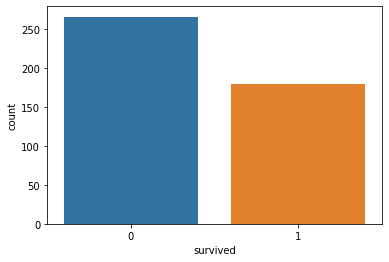

In [6]:
# 目的変数 IsPay の分布を確認する
# 生還結果（1=生還, 0=死亡）
sns.countplot(x='survived', data=trainData)

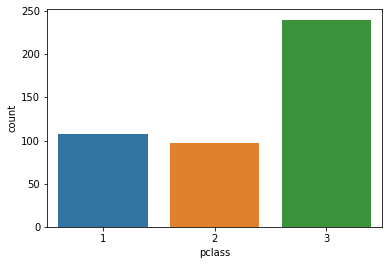

In [7]:
# 説明変数の分布状況を把握
sns.countplot(x='pclass', data=trainData)

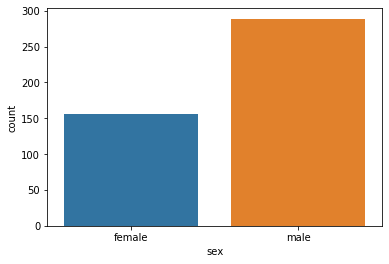

In [8]:
# 説明変数の分布状況を把握
sns.countplot(x='sex', data=trainData)

ValueError: cannot convert float NaN to integer

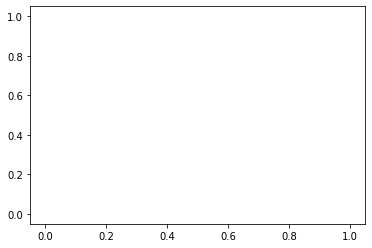

In [9]:
# 説明変数の分布状況を把握
sns.distplot(trainData["age"])
#sns.countplot(x='age', data=trainData)

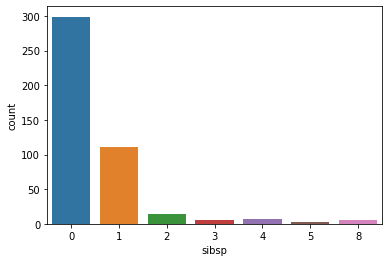

In [10]:
# 説明変数の分布状況を把握
# 乗船していた兄弟、配偶者の数
sns.countplot(x='sibsp', data=trainData)

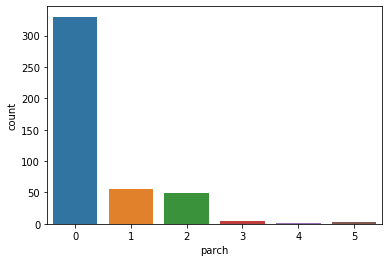

In [11]:
# 説明変数の分布状況を把握
# 乗船していた両親、子供の数
sns.countplot(x='parch', data=trainData)

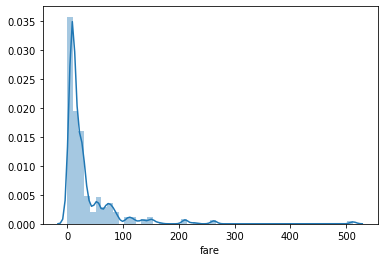

In [12]:
# 説明変数の分布状況を把握
# 運賃
sns.distplot(trainData["fare"])

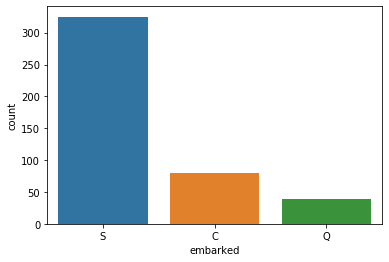

In [13]:
# 説明変数の分布状況を把握
# 乗船した港（S=Southampton, C=Cherbourg, Q=Queenstown）
sns.countplot(x='embarked', data=trainData)

In [14]:
# 説明変数の値を加工
trainData["sex_val"] = trainData.apply(lambda x: 1 if x["sex"] == "male" else  0, axis=1)
trainData.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_val
0,3,1,1,female,35.0,1,0,53.1000,S,0
1,4,0,3,male,35.0,0,0,8.0500,S,1
2,7,0,3,male,2.0,3,1,21.0750,S,1
3,9,1,2,female,14.0,1,0,30.0708,C,0
4,11,1,1,female,58.0,0,0,26.5500,S,0


In [15]:
# データからを説明変数データを抽出
#x_train = trainData[["id", "pclass", "sex?val", "age", "sibsp", "parch", "fare"]]
x_train = trainData[["id", "pclass", "sex_val", "sibsp", "parch", "fare"]]
x_train.head()

,id,pclass,sex_val,sibsp,parch,fare
0,3,1,0,1,0,53.1000
1,4,3,1,0,0,8.0500
2,7,3,1,3,1,21.0750
3,9,2,0,1,0,30.0708
4,11,1,0,0,0,26.5500


In [16]:
# データからを目的変数データを抽出
y_train = trainData["survived"]
y_train.head()

0    1
1    0
2    0
3    1
4    1
Name: survived, dtype: int64

In [17]:
# 勾配ブースティング決定木分析を実施し、判別モデルを構築する
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

([<matplotlib.axis.YTick at 0x228b8c3a7f0>,
 <a list of 6 Text yticklabel objects>)

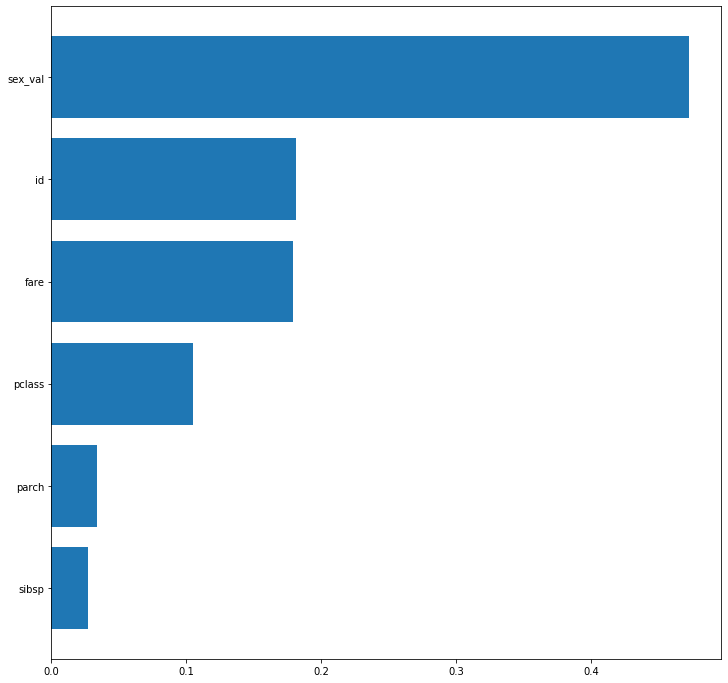

In [18]:
# 変数の重要度を可視化する
#feature_names = ["id", "pclass", "age", "sibsp", "parch", "fare"]
feature_names = ["id", "pclass", "sex_val", "sibsp", "parch", "fare"]
values, names = zip(*sorted(zip(clf.feature_importances_, feature_names)))
plt.figure(figsize=(12,12))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names)

In [24]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(x_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(x_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.8921348314606742


,predict(0),predict(1)
target(0),249,17
target(1),31,148


In [26]:
y_train.head()

0    1
1    0
2    0
3    1
4    1
Name: survived, dtype: int64

In [27]:
x_train.head()

,id,pclass,sex_val,sibsp,parch,fare
0,3,1,0,1,0,53.1000
1,4,3,1,0,0,8.0500
2,7,3,1,3,1,21.0750
3,9,2,0,1,0,30.0708
4,11,1,0,0,0,26.5500


In [20]:
# 説明変数の値を加工
testData["sex_val"] = testData.apply(lambda x: 1 if x["sex"] == "male" else  0, axis=1)
testData.head()

,id,pclass,sex,age,sibsp,parch,fare,embarked,sex_val
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,2,3,female,26.0,0,0,7.9250,S,0
3,5,3,male,NaN,0,0,8.4583,Q,1
4,6,1,male,54.0,0,0,51.8625,S,1


In [21]:
# データからを説明変数データを抽出
#x_test = testData[["id", "pclass", "sex?val", "age", "sibsp", "parch", "fare"]]
x_test = testData[["id", "pclass", "sex_val", "sibsp", "parch", "fare"]]
x_test.head()

,id,pclass,sex_val,sibsp,parch,fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,2,3,0,0,0,7.9250
3,5,3,1,0,0,8.4583
4,6,1,1,0,0,51.8625


In [30]:
result = testData[["id"]]
# モデルからを目的変数データを抽出
y_test = clf.predict(x_test)
result["survived"] = y_test
result.head()

C:\Users\tamot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,survived
0,0,0
1,1,1
2,2,1
3,5,0
4,6,1


In [29]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(x_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

1.0


,predict(0),predict(1)
target(0),285,0
target(1),0,161


In [140]:
# 結果をTSV出力
#export csv
#with open ('C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/y_test.tsv', 'w', newline='') as wf:
#    writer = csv.writer(wf)
#    writer.writerows(y_test.to_csv(sep='\t'))
#result = y_test[['id', 'survived']]
result.to_csv(path_or_buf='C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/y_test.tsv', sep='\t', header=False, index=False, encoding='utf8')